# Bitcoin Time Series

Using the data over the 6 months

## ARIMA(AR and MA)

### Check the data and its stationarity

In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [39]:
dateparse=lambda datetime: pd.datetime.strptime(datetime,'%d/%m/%Y %H:%M')
original=pd.read_csv("./../data/processed_data.csv")

def rename_datetime(data):
    data.rename(columns={'Unnamed: 0': 'datetime'},inplace=True)
    data['datetime']=pd.to_datetime(data['datetime'])
    data.set_index('datetime', inplace=True)
    return data

original=rename_datetime(original)

original

,Open,High,Low,Close,Volume,google_trends,tw_compound,tw_polarity,tw_subjectivity,tweet_volume,re_compound,re_polarity,re_subjectivity
datetime,,,,,,,,,,,,,
2022-01-01 00:00:00,46210.57,46729.73,46210.55,46650.01,8957.465,71.000000,0.228459,0.127819,0.399377,1314.0,0.806147,0.106285,0.464971
2022-01-01 01:00:00,46650.00,46944.56,46570.34,46766.78,7276.249,74.227273,0.235804,0.115225,0.380319,1064.0,0.523754,0.165466,0.469433
2022-01-01 02:00:00,46767.44,46917.87,46709.44,46796.14,4478.713,74.227273,0.216377,0.094649,0.391375,986.0,0.404721,-0.003025,0.499500
2022-01-01 03:00:00,46796.15,46888.00,46746.32,46789.56,4208.992,61.318182,0.254585,0.124391,0.376654,942.0,0.307653,0.129557,0.461581
2022-01-01 04:00:00,46789.55,46868.74,46605.00,46690.81,6149.298,61.318182,0.199023,0.106416,0.405293,832.0,0.682042,0.108311,0.422146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 19:00:00,19092.90,19113.40,18951.10,18962.10,20425.187,112.036340,0.097033,0.062959,0.339059,2032.0,0.537786,0.112709,0.459895
2022-06-30 20:00:00,18962.10,19038.20,18843.00,18921.30,32033.326,117.932989,0.096938,0.049762,0.366837,2225.0,0.456615,0.075858,0.494026
2022-06-30 21:00:00,18921.30,19064.70,18563.00,18742.90,43214.413,115.574329,0.112159,0.054471,0.355057,2159.0,0.786424,0.053945,0.433892


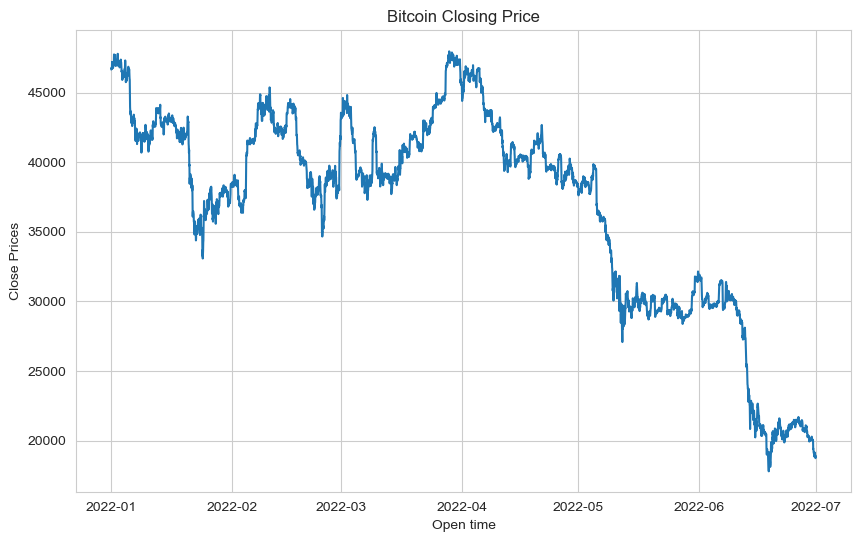

In [40]:
# visualize the per hour closing price of the bitcoin
plt.figure(figsize=(10,6))
plt.xlabel('Open time')
plt.ylabel('Close Prices')
plt.plot(original['Close'])
plt.title('Bitcoin Closing Price')
plt.show()

In [41]:
df_close=original['Close']
df_close.isnull().sum()

0

<Axes: ylabel='Density'>

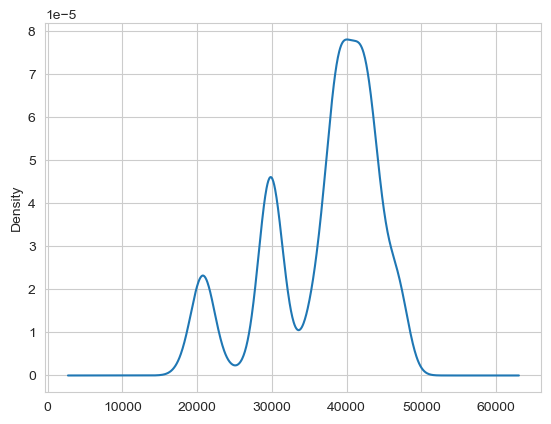

In [42]:
# visualize the data in our series through a probability distribution

df_close.plot(kind='kde')

There are three spikes in the plot

#### Check the stationarity

Using the ADF test to check if a series is stationary or not.
But it's obvious that this data is not stationary

In [43]:
def test_stationarity(timeseries):
    print("Results for dickey fuller test")
    results=adfuller(timeseries, autolag='AIC')
    output=pd.Series(results[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key, values in results[4].items():
        output['critical value (%s)'%key] =values
    print(output)

In [44]:
test_stationarity(df_close)

Results for dickey fuller test
Test Statistics                  -0.266513
p-value                           0.930115
No. of lags used                  0.000000
Number of observations used    4343.000000
critical value (1%)              -3.431857
critical value (5%)              -2.862206
critical value (10%)             -2.567124
dtype: float64


Make the data stationary

Text(0.5, 1.0, '2 order differencing')

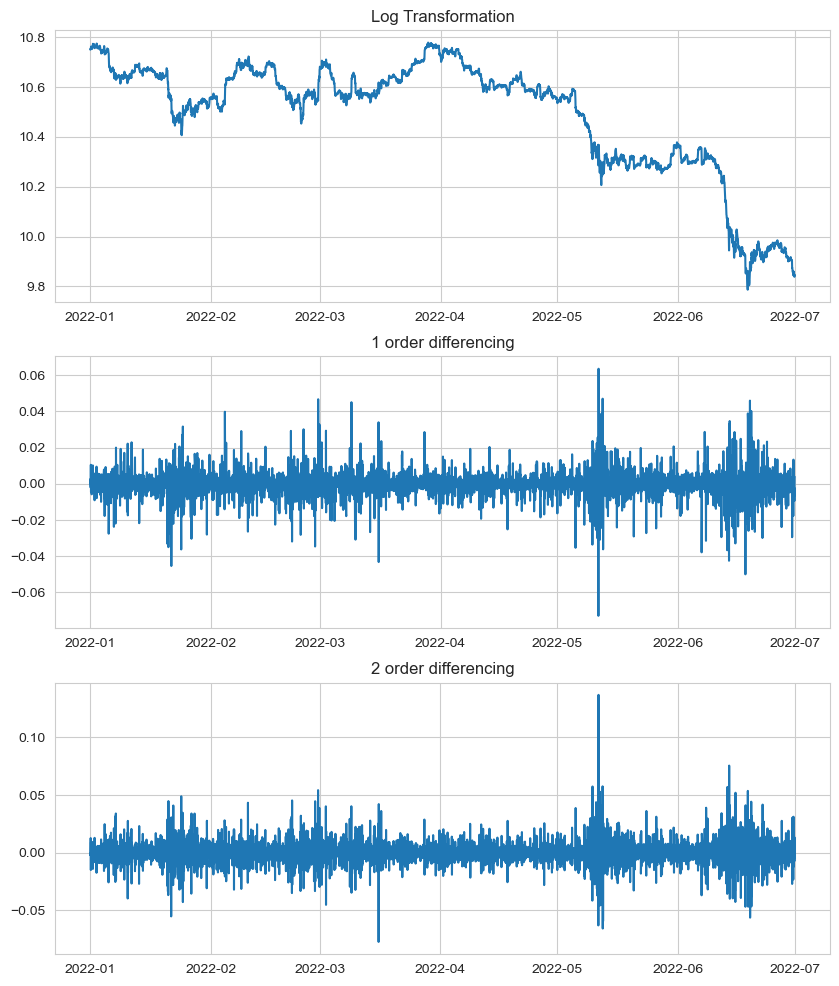

In [45]:
df_log=np.log(df_close)
fig, axe=plt.subplots(3,1, figsize=(10,12))
axe[0].plot(df_log)
axe[0].set_title('Log Transformation')
# Take first difference to remove the trend
df_diff=df_log.diff().dropna()
axe[1].plot(df_diff)
axe[1].set_title('1 order differencing')

df_diff_2=df_diff.diff().dropna()
axe[2].plot(df_diff_2)
axe[2].set_title('2 order differencing')

In [46]:
test_stationarity(df_diff)

Results for dickey fuller test
Test Statistics                 -66.245263
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    4342.000000
critical value (1%)              -3.431857
critical value (5%)              -2.862206
critical value (10%)             -2.567124
dtype: float64


### ACF and PACF

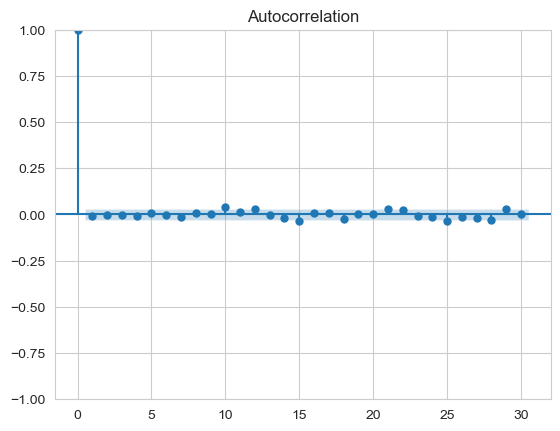

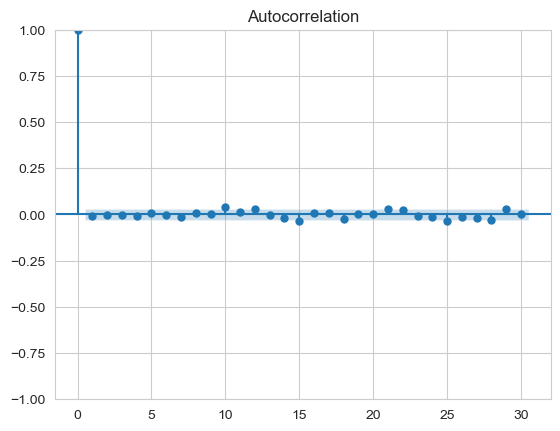

In [47]:
n_lags=30
plot_acf(df_diff, lags=n_lags)

/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


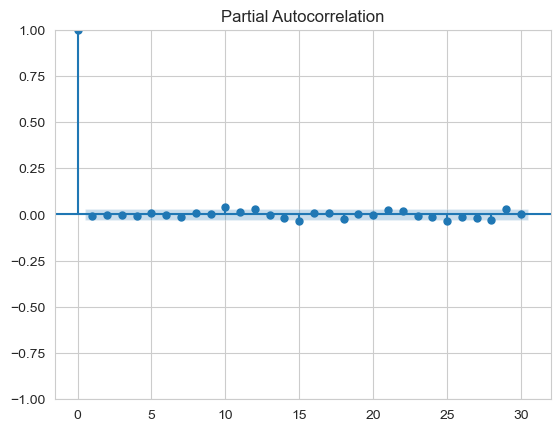

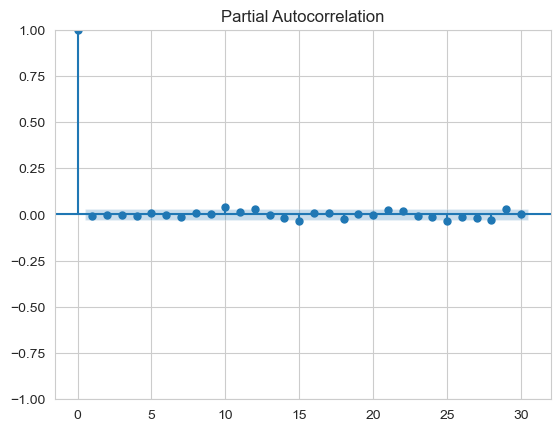

In [48]:
plot_pacf(df_diff, lags=n_lags)

In [49]:
# acf : 10, 15
# pacf: 11, 24


### Split the data

In [50]:
def train_test_split(df,size=0.8):
    train_data, test_data=df[:int(len(df)*size)], df[int(len(df)*size):]
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Closing Prices')
    plt.plot(df,'green', label='Train data')
    plt.plot(test_data, 'blue', label='Test data')
    plt.legend()
    return train_data, test_data

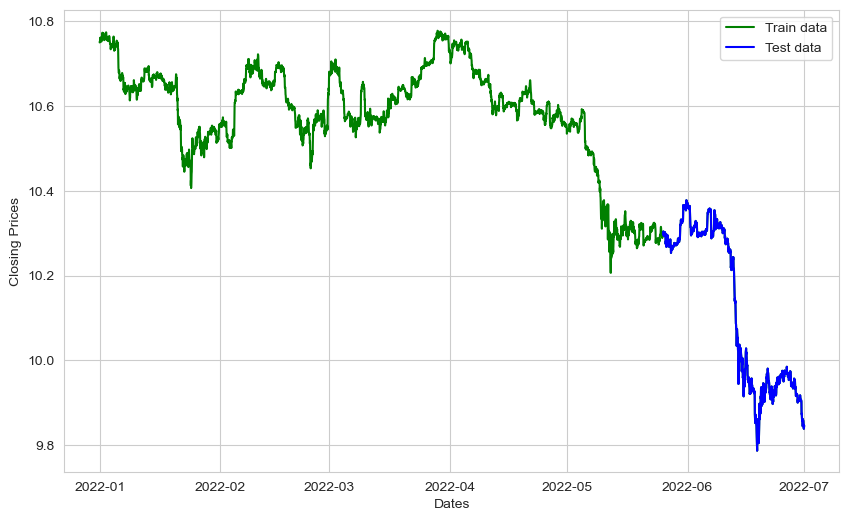

In [51]:
train_data,test_data=train_test_split(df_log, 0.8)

### Model Selection

/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sari

AIC for ARIMA(10,1,10):-24363.861496865884
AIC for ARIMA(10,1,15):-24363.01133063772
AIC for ARIMA(15,1,10):-24345.209589319024
AIC for ARIMA(15,1,15):-24353.75452749451


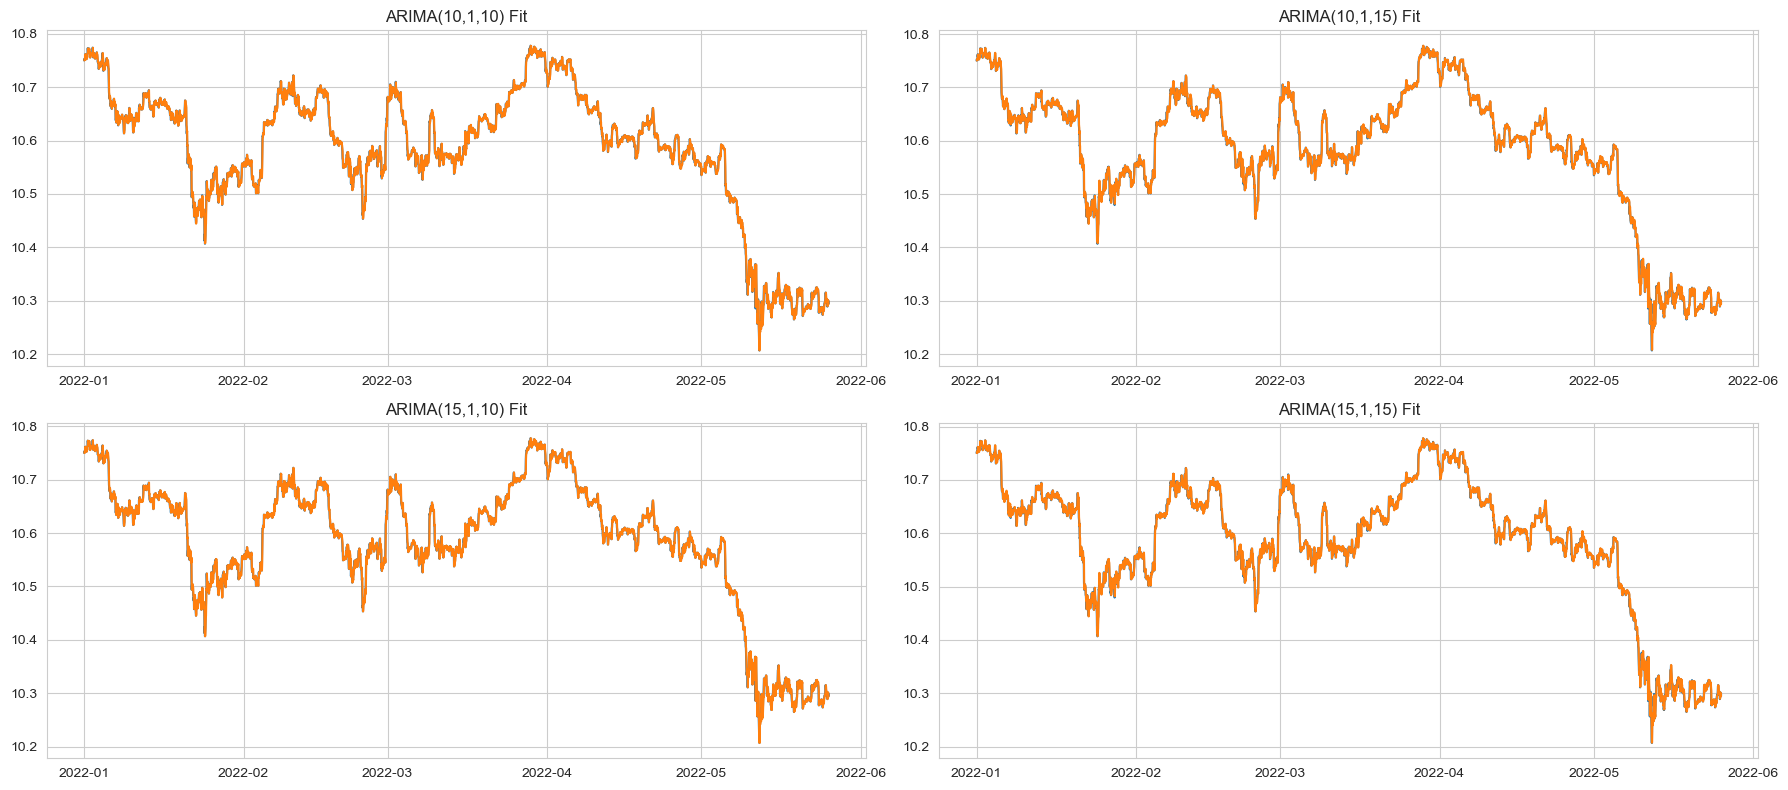

In [52]:
ar_orders=[10,15]
ma_orders=[10,15]

fitted_model_dict={}
AIC_dict={}

fig,axes=plt.subplots(len(ar_orders),len(ma_orders),figsize=(18,8))
for idx, ar_order in enumerate(ar_orders):
    for idy, ma_order in enumerate(ma_orders):
        # create ARIMA model
        model=ARIMA(train_data, order=(ar_order,1,ma_order))
        model_fit = model.fit()
        fitted_model_dict[ar_order,ma_order]=model_fit
        AIC_dict[ar_order,ma_order]=fitted_model_dict[ar_order,ma_order].aic
        ax = axes[idx, idy]
        ax.set_title('ARIMA(%s,1,%s) Fit'%(ar_order,ma_order))
        ax.plot(train_data)
        ax.plot(model_fit.fittedvalues[1:])
plt.tight_layout()
for ar_order in ar_orders:
    for ma_order in ma_orders:
        print('AIC for ARIMA(%s,1,%s):%s'%(ar_order,ma_order,AIC_dict[ar_order,ma_order]))

In [53]:
# Sort the dictionary by value and return the first key-value pair
min_key, min_val = sorted(AIC_dict.items(), key=lambda x: x[1])[0]
print("The ARIMA model with the lowest AIC is: (%s,1,%s)"%(min_key[0],min_key[1]))

The ARIMA model with the lowest AIC is: (10,1,10)


Figure(1500x800)


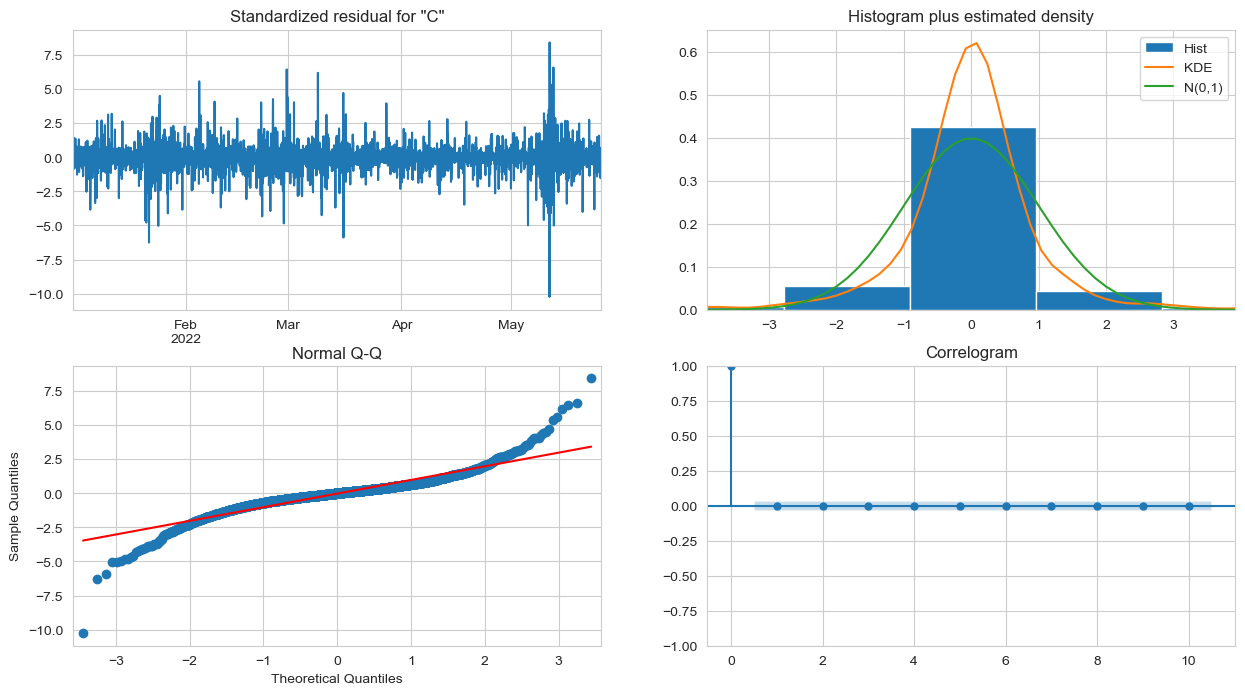

In [54]:
print(fitted_model_dict[min_key[0],min_key[1]].plot_diagnostics(figsize=(15,8)))

datetime
2022-01-01 00:00:00    10.750428
2022-01-01 01:00:00    10.752928
2022-01-01 02:00:00    10.753556
2022-01-01 03:00:00    10.753415
2022-01-01 04:00:00    10.751303
                         ...    
2022-05-25 14:00:00    10.298805
2022-05-25 15:00:00    10.301176
2022-05-25 16:00:00    10.296073
2022-05-25 17:00:00    10.293832
2022-05-25 18:00:00    10.298838
Name: Close, Length: 3475, dtype: float64
datetime
2022-01-01 00:00:00     0.000000
2022-01-01 01:00:00    10.750428
2022-01-01 02:00:00    10.752848
2022-01-01 03:00:00    10.753547
2022-01-01 04:00:00    10.753409
                         ...    
2022-05-25 14:00:00    10.293796
2022-05-25 15:00:00    10.298561
2022-05-25 16:00:00    10.300678
2022-05-25 17:00:00    10.296030
2022-05-25 18:00:00    10.293877
Length: 3475, dtype: float64


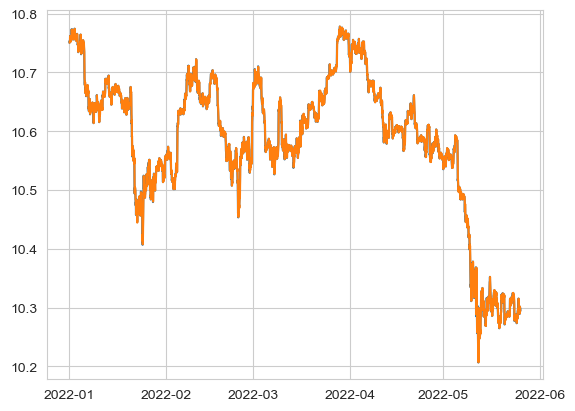

In [55]:
model_fit=fitted_model_dict[min_key[0],min_key[1]]
#model_fit=fitted_model_dict[3,2]
#get the predictions and residuals
predictions=model_fit.fittedvalues
# residuals = test_data - predictions
print(train_data)
print(predictions)
plt.plot(train_data)
plt.plot(predictions[1:])

In [56]:
pre_test=model_fit.forecast(steps=len(test_data))
# lower_series = pd.Series(conf[:, 0], index=test_data.index)
# upper_series = pd.Series(conf[:, 1], index=test_data.index)
print(pre_test)

2022-05-25 19:00:00    10.298893
2022-05-25 20:00:00    10.298715
2022-05-25 21:00:00    10.298531
2022-05-25 22:00:00    10.298326
2022-05-25 23:00:00    10.298632
                         ...    
2022-06-30 19:00:00    10.298730
2022-06-30 20:00:00    10.298730
2022-06-30 21:00:00    10.298730
2022-06-30 22:00:00    10.298730
2022-06-30 23:00:00    10.298730
Freq: H, Name: predicted_mean, Length: 869, dtype: float64


In [57]:
fc_series = pd.Series(np.array(pre_test), index=test_data.index)
fc_series

datetime
2022-05-25 19:00:00    10.298893
2022-05-25 20:00:00    10.298715
2022-05-25 21:00:00    10.298531
2022-05-25 22:00:00    10.298326
2022-05-25 23:00:00    10.298632
                         ...    
2022-06-30 19:00:00    10.298730
2022-06-30 20:00:00    10.298730
2022-06-30 21:00:00    10.298730
2022-06-30 22:00:00    10.298730
2022-06-30 23:00:00    10.298730
Length: 869, dtype: float64

<Axes: xlabel='datetime'>

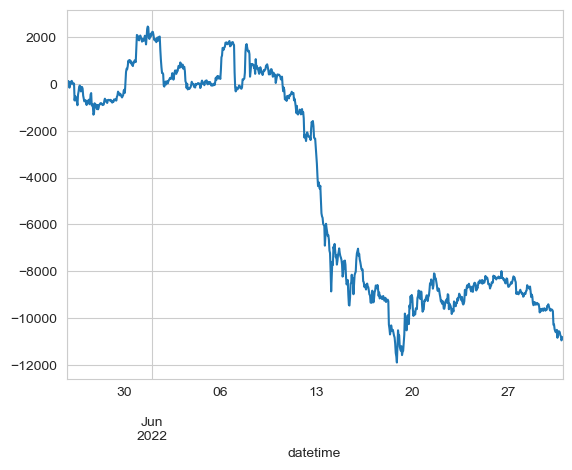

In [58]:
residuals=np.exp(test_data)-np.exp(fc_series)
residuals.plot()

RMSE: 6324.782257925936
MAPE: 0.2258146524691459


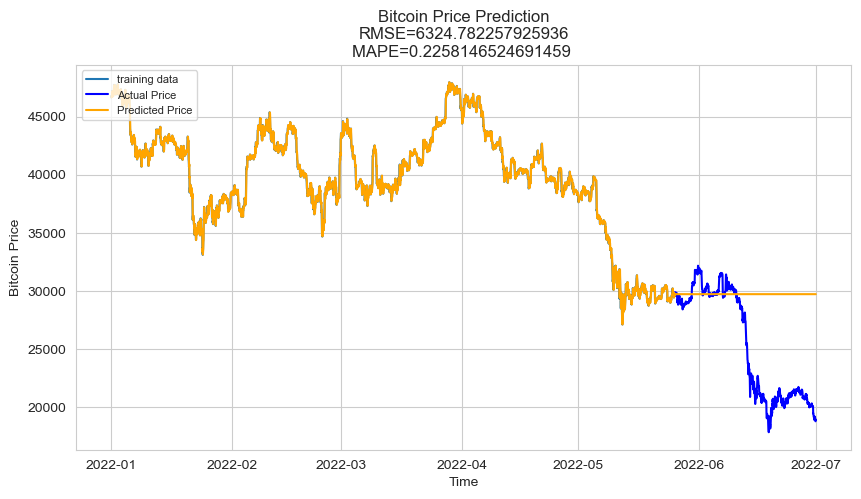

In [59]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
concat_df=[predictions[1:],fc_series]
pred_df=pd.concat(concat_df)
plt.figure(figsize=(10,5), dpi=100)
plt.plot(np.exp(train_data), label='training data')
plt.plot(np.exp(test_data), color = 'blue', label='Actual Price')
plt.plot(np.exp(pred_df), color = 'orange',label='Predicted Price')
#plt.fillbetween(test_data.index, lower_series, upper_series, color='k', alpha=.15)
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc_series)))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(residuals)/np.abs(np.exp(test_data)))
print('MAPE: '+str(mape))
plt.title('Bitcoin Price Prediction\nRMSE=%s\nMAPE=%s '%(str(rmse),str(mape)))
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()